          Date first seen  Duration  Proto     Src IP Addr  Src Pt  \
0 2017-03-15 00:01:16.632     0.000  TCP     192.168.100.5     445   
1 2017-03-15 00:01:16.552     0.000  TCP     192.168.100.5     445   
2 2017-03-15 00:01:16.551     0.004  TCP    192.168.220.15   48888   
3 2017-03-15 00:01:16.631     0.004  TCP    192.168.220.16   58844   
4 2017-03-15 00:01:16.552     0.000  TCP     192.168.100.5     445   

      Dst IP Addr   Dst Pt  Packets     Bytes  Flows   Flags  Tos   class  \
0  192.168.220.16  58844.0        1       108      1  .AP...    0  normal   
1  192.168.220.15  48888.0        1       108      1  .AP...    0  normal   
2   192.168.100.5    445.0        2       174      1  .AP...    0  normal   
3   192.168.100.5    445.0        2       174      1  .AP...    0  normal   
4  192.168.220.15  48888.0        1       108      1  .AP...    0  normal   

  attackType attackID attackDescription  
0        ---      ---               ---  
1        ---      ---           

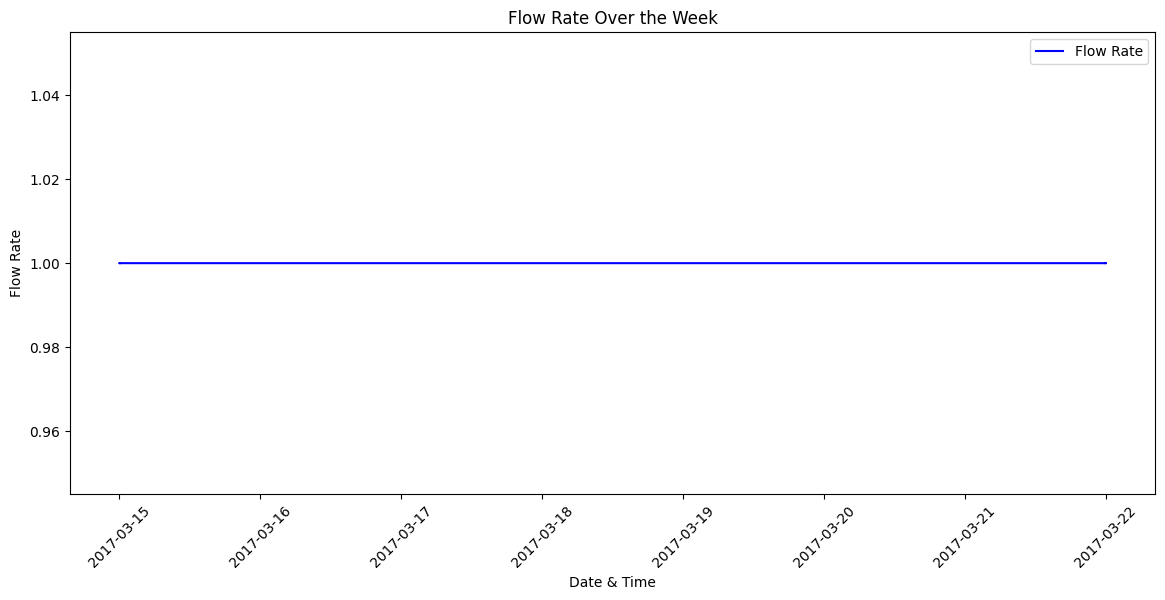

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings


warnings.filterwarnings('ignore')
df1 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_1.csv")
#df2 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_2.csv")
#df3 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_3.csv")
#df4 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_4.csv")
pd.set_option('display.max_columns', None)

#print(df.head(20))
#print(df.describe())
#print(df[df["class"].isin(["attacker"])])
df1['Date first seen'] = pd.to_datetime(df1['Date first seen'])

# Plot the flow rate against the date and time
plt.figure(figsize=(14, 6))
plt.plot(df1['Date first seen'], df1['Flows'], color='blue', label='Flow Rate')
print(df1.head())
plt.xlabel('Date & Time')
plt.ylabel('Flow Rate')
plt.title('Flow Rate Over the Week')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [4]:
df2 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_2.csv")

In [5]:
df3 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_3.csv")

In [6]:
df4 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_4.csv")

In [7]:
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

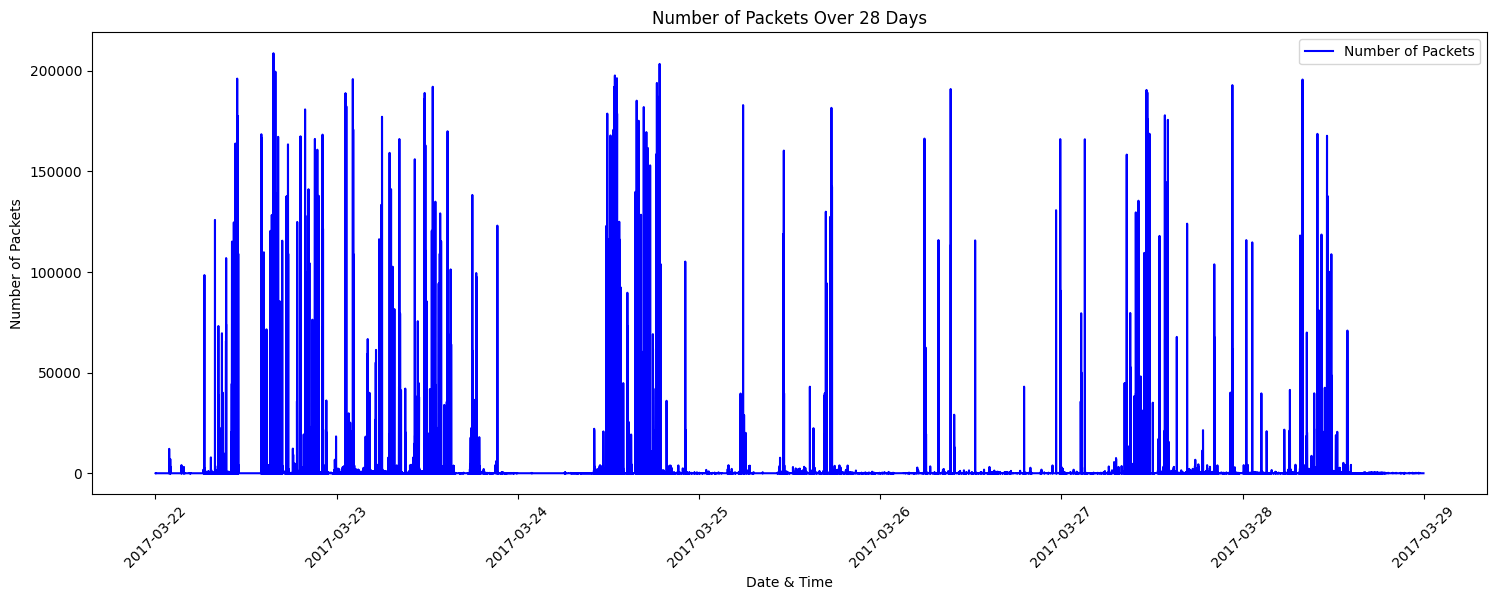

In [9]:
pd.set_option('display.max_columns', None)

df['Date first seen'] = pd.to_datetime(df['Date first seen'])

# Plot the number of packets for each second
plt.figure(figsize=(18, 6))
plt.plot(df['Date first seen'], df['Packets'], color='blue', label='Number of Packets')

plt.xlabel('Date & Time')
plt.ylabel('Number of Packets')
plt.title('Number of Packets Over 28 Days')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [10]:
print(df.describe())

                     Date first seen      Duration        Src Pt  \
count                       10310733  3.128793e+07  3.128793e+07   
mean   2017-03-25 01:40:58.218667008  1.232569e-01  2.463138e+04   
min       2017-03-22 00:00:00.070000  0.000000e+00  0.000000e+00   
25%    2017-03-23 11:39:27.828999936  0.000000e+00  8.000000e+01   
50%       2017-03-24 13:10:59.408000  0.000000e+00  8.082000e+03   
75%    2017-03-27 10:47:44.172999936  3.100000e-02  5.008000e+04   
max       2017-03-28 23:58:21.138000  2.380080e+02  6.553500e+04   
std                              NaN  8.024699e-01  2.509684e+04   

             Dst Pt       Packets       Flows           Tos   Hour of Day  
count  3.128793e+07  3.128793e+07  31287933.0  3.128793e+07  1.031073e+07  
mean   2.441451e+04  1.535089e+01         1.0  9.817501e+00  1.259660e+01  
min    0.000000e+00  1.000000e+00         1.0  0.000000e+00  0.000000e+00  
25%    8.000000e+01  1.000000e+00         1.0  0.000000e+00  1.000000e+01  
50%    

In [8]:
df = pd.get_dummies(df, columns=['Proto'], prefix='Proto')

In [12]:
print(df.head())

          Date first seen  Duration     Src IP Addr  Src Pt     Dst IP Addr  \
0 2017-03-22 00:00:00.071     0.000   192.168.100.5     445  192.168.220.16   
1 2017-03-22 00:00:00.070     0.000   192.168.100.5     445  192.168.220.15   
2 2017-03-22 00:00:05.953     0.004  192.168.220.15   48888   192.168.100.5   
3 2017-03-22 00:00:05.955     0.004  192.168.220.16   58844   192.168.100.5   
4 2017-03-22 00:00:06.468     0.000   192.168.100.5     445  192.168.220.15   

    Dst Pt  Packets     Bytes  Flows   Flags  Tos   class attackType attackID  \
0  58844.0        1       108      1  .AP...    0  normal        ---      ---   
1  48888.0        1       108      1  .AP...    0  normal        ---      ---   
2    445.0        2       174      1  .AP...    0  normal        ---      ---   
3    445.0        2       174      1  .AP...    0  normal        ---      ---   
4  48888.0        1       108      1  .AP...    0  normal        ---      ---   

  attackDescription Day of Week  Hour 

In [9]:
protocol_columns = [col for col in df.columns if 'Proto_' in col]
df[protocol_columns] = df[protocol_columns].astype(int)
print(df.head())

              Date first seen  Duration     Src IP Addr  Src Pt  \
0  2017-03-15 00:01:16.632000     0.000   192.168.100.5     445   
1  2017-03-15 00:01:16.552000     0.000   192.168.100.5     445   
2  2017-03-15 00:01:16.551000     0.004  192.168.220.15   48888   
3  2017-03-15 00:01:16.631000     0.004  192.168.220.16   58844   
4  2017-03-15 00:01:16.552000     0.000   192.168.100.5     445   

      Dst IP Addr   Dst Pt  Packets     Bytes  Flows   Flags  Tos   class  \
0  192.168.220.16  58844.0        1       108      1  .AP...    0  normal   
1  192.168.220.15  48888.0        1       108      1  .AP...    0  normal   
2   192.168.100.5    445.0        2       174      1  .AP...    0  normal   
3   192.168.100.5    445.0        2       174      1  .AP...    0  normal   
4  192.168.220.15  48888.0        1       108      1  .AP...    0  normal   

  attackType attackID attackDescription  Proto_ICMP   Proto_IGMP   \
0        ---      ---               ---            0            0

In [10]:
df.columns.values.tolist()

['Date first seen',
 'Duration',
 'Src IP Addr',
 'Src Pt',
 'Dst IP Addr',
 'Dst Pt',
 'Packets',
 'Bytes',
 'Flows',
 'Flags',
 'Tos',
 'class',
 'attackType',
 'attackID',
 'attackDescription',
 'Proto_ICMP ',
 'Proto_IGMP ',
 'Proto_TCP  ',
 'Proto_UDP  ']

In [27]:
print(df.isnull().sum())

Duration             0
Src IP Addr          0
Src Pt               0
Dst IP Addr          0
Dst Pt               0
Packets              0
Bytes                0
Flags                0
Tos                  0
class                0
attackType           0
attackID             0
attackDescription    0
Proto_ICMP           0
Proto_IGMP           0
Proto_TCP            0
Proto_UDP            0
Day of Week          0
Hour                 0
Bytes_Transf         0
Avg Packet Size      0
dtype: int64


In [28]:
df.describe()

,Duration,Src Pt,Dst Pt,Packets,Bytes,Tos,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Hour,Bytes_Transf,Avg Packet Size
count,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07
mean,2.139045e-16,2.463138e+04,2.441451e+04,3.726678e-19,1.910999e+04,9.817501e+00,5.342315e-04,2.860528e-05,8.636796e-01,1.357576e-01,1.243693e+01,1.511337e-19,-5.136680e+04
std,1.000000e+00,2.509684e+04,2.509105e+04,1.000000e+00,2.039469e+06,1.504512e+01,2.310727e-02,5.348314e-03,3.431285e-01,3.425310e-01,4.005386e+00,1.000000e+00,2.747360e+06
min,-1.535969e-01,0.000000e+00,0.000000e+00,-1.457377e-02,4.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.349491e-03,-4.815418e+08
25%,-1.535969e-01,8.000000e+01,8.000000e+01,-1.457377e-02,6.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,-9.337723e-03,-2.559329e+04
50%,-1.535969e-01,8.082000e+03,8.082000e+03,-1.355824e-02,1.440000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.300000e+01,-9.299478e-03,-9.735775e+03
75%,-1.149662e-01,5.008000e+04,4.999600e+04,-1.254271e-02,4.540000e+02,3.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.500000e+01,-9.147477e-03,-4.528683e+03
max,2.964407e+02,6.553500e+04,6.553500e+04,2.119948e+02,5.162000e+08,1.920000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.300000e+01,2.530957e+02,2.396000e+08


In [30]:
df

,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flags,Tos,class,attackType,attackID,attackDescription,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour,Bytes_Transf,Avg Packet Size
0,-0.153597,192.168.100.5,445,192.168.220.16,58844.0,-0.014574,108.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009317,-7410.571759
1,-0.153597,192.168.100.5,445,192.168.220.15,48888.0,-0.014574,108.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009317,-7410.571759
2,-0.148612,192.168.220.15,48888,192.168.100.5,445.0,-0.013558,174.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009285,-12833.521268
3,-0.148612,192.168.220.16,58844,192.168.100.5,445.0,-0.013558,174.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009285,-12833.521268
4,-0.153597,192.168.100.5,445,192.168.220.15,48888.0,-0.014574,108.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009317,-7410.571759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,-0.153597,DNS,53,192.168.200.8,54577.0,-0.014574,128.0,......,0,normal,---,---,---,0,0,0,1,Tuesday,23,-0.009307,-8782.899863
31287929,-0.050166,10068_66,443,192.168.200.8,58432.0,-0.002387,2304.0,.AP.S.,32,normal,---,---,---,0,0,1,0,Tuesday,23,-0.008240,-965066.935376
31287930,-0.153597,192.168.200.8,62120,DNS,53.0,-0.014574,87.0,......,0,normal,---,---,---,0,0,0,1,Tuesday,23,-0.009327,-5969.627250
31287931,-0.153597,192.168.200.8,54577,DNS,53.0,-0.014574,87.0,......,0,normal,---,---,---,0,0,0,1,Tuesday,23,-0.009327,-5969.627250


In [32]:
df[df['Day of Week'].isnull()]

,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flags,Tos,class,attackType,attackID,attackDescription,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour,Bytes_Transf,Avg Packet Size


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
def convert_to_numeric(value):
    multipliers = {'K': 1e3, 'M': 1e6, 'G': 1e9}
    if isinstance(value, str):
        suffix = value[-1]
        if suffix in multipliers:
            return float(value[:-1]) * multipliers[suffix]
    return float(value)

df['Bytes'] = df['Bytes'].apply(convert_to_numeric)
scaler = StandardScaler()
df['Bytes_Transf'] = scaler.fit_transform(df[['Bytes']])

In [22]:
df['Avg Packet Size'] = df['Bytes'] / df['Packets']

In [20]:
scaler = StandardScaler()
columns_to_normalize = ['Duration', 'Packets']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [23]:
df

,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flags,Tos,class,attackType,attackID,attackDescription,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour,Bytes_Transf,Avg Packet Size
0,-0.153597,192.168.100.5,445,192.168.220.16,58844.0,-0.014574,108.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009317,-7410.571759
1,-0.153597,192.168.100.5,445,192.168.220.15,48888.0,-0.014574,108.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009317,-7410.571759
2,-0.148612,192.168.220.15,48888,192.168.100.5,445.0,-0.013558,174.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009285,-12833.521268
3,-0.148612,192.168.220.16,58844,192.168.100.5,445.0,-0.013558,174.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009285,-12833.521268
4,-0.153597,192.168.100.5,445,192.168.220.15,48888.0,-0.014574,108.0,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009317,-7410.571759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,-0.153597,DNS,53,192.168.200.8,54577.0,-0.014574,128.0,......,0,normal,---,---,---,0,0,0,1,Tuesday,23,-0.009307,-8782.899863
31287929,-0.050166,10068_66,443,192.168.200.8,58432.0,-0.002387,2304.0,.AP.S.,32,normal,---,---,---,0,0,1,0,Tuesday,23,-0.008240,-965066.935376
31287930,-0.153597,192.168.200.8,62120,DNS,53.0,-0.014574,87.0,......,0,normal,---,---,---,0,0,0,1,Tuesday,23,-0.009327,-5969.627250
31287931,-0.153597,192.168.200.8,54577,DNS,53.0,-0.014574,87.0,......,0,normal,---,---,---,0,0,0,1,Tuesday,23,-0.009327,-5969.627250


In [33]:
df["class"].value_counts()

class
normal      28051906
attacker     1656605
victim       1579422
Name: count, dtype: int64

In [36]:
df = df.drop('Hour', axis=1)
df = df.drop('attackID', axis=1)
df = df.drop('attackDescription', axis=1)
df = df.drop('Tos', axis=1)
df = df.drop('Src IP Addr', axis=1)
df = df.drop('Dst IP Addr', axis=1)
df = df.drop('Src Pt', axis=1)
df = df.drop('Dst Pt', axis=1)

In [37]:
df

,Duration,Packets,Bytes,Flags,class,attackType,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Bytes_Transf,Avg Packet Size
0,-0.153597,-0.014574,108.0,.AP...,normal,---,0,0,1,0,Wednesday,-0.009317,-7410.571759
1,-0.153597,-0.014574,108.0,.AP...,normal,---,0,0,1,0,Wednesday,-0.009317,-7410.571759
2,-0.148612,-0.013558,174.0,.AP...,normal,---,0,0,1,0,Wednesday,-0.009285,-12833.521268
3,-0.148612,-0.013558,174.0,.AP...,normal,---,0,0,1,0,Wednesday,-0.009285,-12833.521268
4,-0.153597,-0.014574,108.0,.AP...,normal,---,0,0,1,0,Wednesday,-0.009317,-7410.571759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,-0.153597,-0.014574,128.0,......,normal,---,0,0,0,1,Tuesday,-0.009307,-8782.899863
31287929,-0.050166,-0.002387,2304.0,.AP.S.,normal,---,0,0,1,0,Tuesday,-0.008240,-965066.935376
31287930,-0.153597,-0.014574,87.0,......,normal,---,0,0,0,1,Tuesday,-0.009327,-5969.627250
31287931,-0.153597,-0.014574,87.0,......,normal,---,0,0,0,1,Tuesday,-0.009327,-5969.627250


In [38]:
df = df.drop('Avg Packet Size', axis=1)